In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('data_science_job.csv')

In [38]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [39]:
df.shape

(19158, 13)

In [40]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [41]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [42]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12229,0.925,Full time course,High School,1.0,83.0
7488,0.624,no_enrollment,Masters,7.0,56.0
13709,0.890,no_enrollment,Masters,16.0,50.0
7699,0.493,no_enrollment,High School,5.0,18.0
15738,0.920,Full time course,Graduate,8.0,37.0


In [43]:
#to check the percentage of rows will stay
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [44]:
df.index

RangeIndex(start=0, stop=19158, step=1)

In [45]:
new_df = df[cols].dropna()
new_df.shape, df.shape

((17182, 5), (19158, 13))

In [46]:
#df.index

In [47]:
#df = df.iloc[new_df.index,:]

In [48]:
#df.shape

In [49]:
new_df.sample(4)

,city_development_index,enrolled_university,education_level,experience,training_hours
8383,0.920,no_enrollment,Graduate,20.0,111.0
15990,0.836,no_enrollment,Primary School,1.0,9.0
11157,0.910,no_enrollment,Masters,20.0,160.0
1759,0.624,Full time course,Graduate,3.0,40.0


Numerical Data

Histogram after applying CCA

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

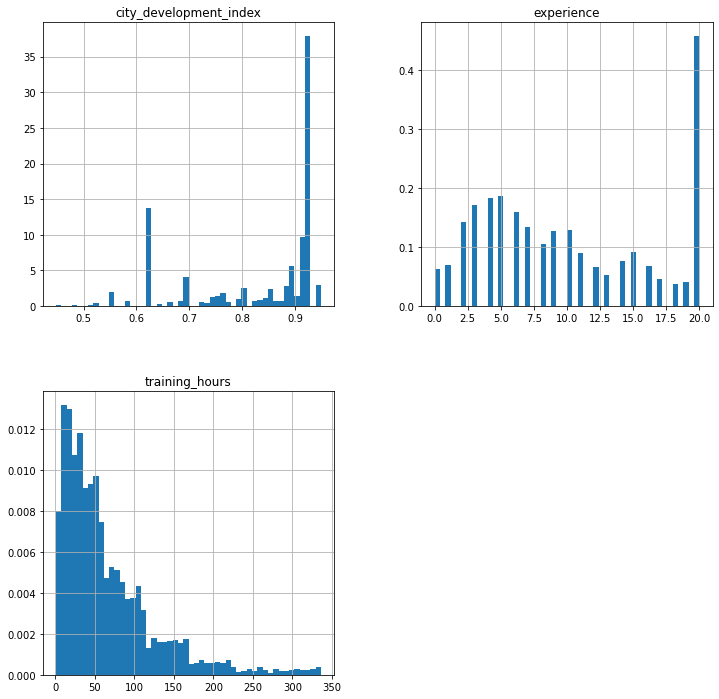

In [50]:
new_df.hist(bins = 50, density = True, figsize = (12,12))

In [78]:
org = df
new = new_df

def eda(org,new,var):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.kdeplot(x = org[var],color='red',ax = ax)
    sns.kdeplot(x = new[var],color='green',ax =ax)
    #org[var].hist(bins = 50,ax = ax, density = True, color = 'red')
    #new[var].hist(bins = 50,ax = ax, density = True, color = 'blue')
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x = org[var])
    plt.subplot(1,2,2)
    sns.boxplot(x = new[var])
    print('Before Imputation ',org[var].var())
    print('After Imputation ',new[var].var())
    print('% change in varience ',((org[var].var()-new[var].var())*100)/org[var].var())

Before Imputation  3586.2881933989347
After Imputation  3576.1342391288217
% change in varience  0.2831326910314337


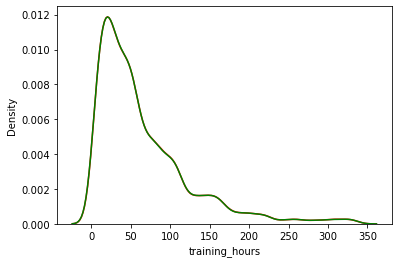

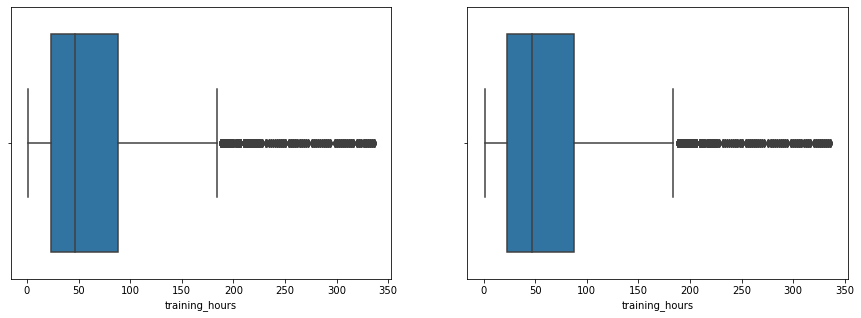

In [81]:
eda(org,new,'training_hours')

Categorical Data

If the ratio for the categories are almost same for the original dataset and the dataset after cca. Then you can apply cca in your model. Otherwise choose another option/technique

In [86]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    
    new_df['enrolled_university'].value_counts() / len(new_df)
],
axis = 1)
temp.columns = ['original','cca']

In [87]:
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [82]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64